<a href="https://colab.research.google.com/github/francoisjaulin/Hill_functions/blob/master/Code_partage_Sciences_Li_ENS_Theoretical_Syst_Bio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Morphogen gradient reconstitution reveals Hedgehog pathway design principles
Sciences - Li 

http://science.sciencemag.org/content/early/2018/04/04/science.aao0645


François JAULIN - +33 6 83 95 21 92 - francoisjaulin@gmail.com

Jean de SEZE - +33 6 01 39 72 79 - jeands216@gmail.com

Annabelle WURMSER - +33 6 - chanabeu@gmail.com


# Reproducibility of the results presented in the article - fig 2F
![Texte alternatif…](http://science.sciencemag.org/content/sci/early/2018/04/04/science.aao0645/F2.large.jpg?width=800&height=600&carousel=1)

# Model Parameters



In [0]:
import numpy as np
import matplotlib.pyplot as plt

  
ap=0.024 #alpha ptc free PTCH production rate
gp=0.006 #gamma p free PTCH degradation rate
gc=0.1539 #gamma c HH-PTCH degratdation rate constant 
koffc=0.3018 #HH-PTCH complex dissociation rate constant
Np=0.9 #Hill coefficient for PTCH control of GLIR production
ar=0.3908 #alpha R GLIR production rate constant
gr=0.002 #gamma R GLIR degradation rate constant
Kr=8.5184 #Hill constant for GLIR control of signal production
nr=1.5735 #Hill coefficient for GLIR control of signal production
ag=0.0056881 #GLIR-dependent signal production rate constant
ag0=0.000098715 #Basal signal production rate constant
D=58.3931 #Free HH diffusion constant
gh=0.00081346 #Free HH degradation rate constant
konhp=0.3018 #HH-PTCH complex association rate constant
Kp=0.5660 #Hill constant for PTCH control of GLIR production
  

#Implementation of H in a simple diffusion regime : 

$\dfrac{\delta H}{\delta t}=D\dfrac{\delta^{2} H}{\delta x^{2}}$

This equation can be approximated as follows : 

$\dfrac{\delta H}{\delta t}\sim \dfrac{H(t+\Delta T)- H(t)}{\Delta t^{2}}$

$\dfrac{\delta^{2} H}{\delta x^{2}}\sim \dfrac{H(x+\Delta x)- 2H(x)+H(x-\Delta x) }{\Delta x^{2}}$

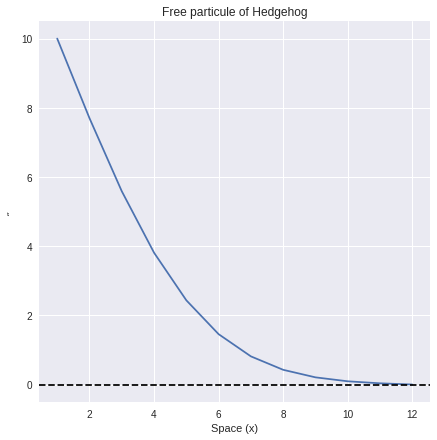

In [0]:
H0=10
dt=0.001 #intervalle de temps
dx=1 #1 micron
nx=10
nt=10000
x=np.linspace(1,nx,nx,dtype=int) #partition espace
t=np.linspace(1,nt,nt,dtype=int) #partition temps
#print(x,t)

H=np.zeros((nt+1,nx+2))

H[0][0]=H0



#Implementation de H à partir de l'équation de diffusion
for i in t:
  H[i][0]=H0 #on fixe la condition initiale sur le bord à H0, pour tout t.
  for j in x:
    H[i][j]=H[i-1][j]+D*(dt/(dx*dx))*(H[i-1][j-1]-2*H[i-1][j]+H[i-1][j+1])
  
#print(H.transpose()[0])

x=np.linspace(1,nx+2,nx+2)
  
plt.figure(figsize=(7,7))
plt.plot(x,H[100])
plt.xlabel('Space (x)')
plt.ylabel('$\H$')
plt.axhline([0], color='black', linestyle='--')
plt.title('Free particule of Hedgehog')
plt.show()

    
  
  

#Open Loop Model of HH spatio-temporal dynamics

We have the following reaction : $H+P\rightleftharpoons C$ where $H$ corresponds to Hedgehog concentration, $P$ its receptor concentration and $C$ the complex $HP$ concentration. 
Those concentration behave as follow : 

##P
$\dfrac{\delta P}{\delta t}=\alpha_{PTC}-\gamma_{P} P - k_{on}HP + k_{off}C$

$P$ is produced with an $\alpha_{PTC}$ rate, degradated by the cell at $\gamma_{P} P$ rate and threw the previous chemical reaction linked to $H$ or created by $C$ dissociation.

##C
$\dfrac{\delta C}{\delta t}=k_{on}HP - k_{off}C-\gamma_{C}C$

$C$ has an analogous behaviour.


##R
$\dfrac{\delta R}{\delta t}=\alpha_{R} \dfrac{P^{n_{P}}}{K^{n_{P}}+P^{n_{P}}}-\gamma_{R}R$

The Hill function inside that equation comes from the Ligand Receptor situation.

##S
$\dfrac{\delta S}{\delta t}=\alpha_{GBS,0}+\alpha_{GBS}\varphi_{R}$ where $\varphi_{R}=\dfrac{K^{n_{R}}}{K^{n_{R}}+R^{n_{R}}}$



##H follows now the following diffusion equation : 
$\dfrac{\delta H}{\delta t}=D\dfrac{\delta^{2} H}{\delta t^{2}}-\gamma_{H}H-k_{on}HP+k_{off}C$



##Initial and boundary conditions

At $t=0$, the system is considered at steady state, with no HH. 

This means that $H = C = 0$

The equations become : 

$0=\alpha_{PTC}-\gamma_{P} P_0$


$0=\alpha_{R} \dfrac{P^{n_{P}}}{K^{n_{P}}+P^{n_{P}}}-\gamma_{R}R_0$

\\

The last equation has no steady state, as S continuously increases with a minimum rate of $\alpha_{GBS,0}$

$\dfrac{\delta S}{\delta t}=\alpha_{GBS,0}+\alpha_{GBS}*\varphi_{R}$ 




In [0]:
#paramètres
ap=0.024 #alpha ptc free PTCH production rate
gp=0.006 #gamma p free PTCH degradation rate
gc=0.1539 #gamma c HH-PTCH degratdation rate constant 
Kh=2.2771 #HH-PTCH complex dissociation constant
koffc=0.3018 #HH-PTCH complex dissociation rate constant
Np=0.9 #Hill coefficient for PTCH control of GLIR production
ar=0.3908 #alpha R GLIR production rate constant
gr=0.002 #gamma R GLIR degradation rate constant
Kr=8.5184 #Hill constant for GLIR control of signal production
nr=1.5735 #Hill coefficient for GLIR control of signal production
ag=0.0056881 #GLIR-dependent signal production rate constant
ag0=0.000098715 #Basal signal production rate constant
D=58.3931 #Free HH diffusion constant
gh=0.00081346 #Free HH degradation rate constant
Kp=0.5660 #Hill constant for PTCH control of GLIR production
ah=0.5431 #HH flux into receiver field at 100% sender strength


konhp=koffc/Kh #HH-PTCH complex association rate constant
P0=ap/gp

  

dt=0.008
dx=1
nx=300
nt=100000
x=np.linspace(1,nx,nx,dtype=int)
t=np.linspace(1,nt,nt,dtype=int)
x2=np.linspace(0,nx+1,nx+2,dtype=int)

#initialisation de H, P, C, S et R  
H=np.zeros((nt+1, nx+2))
P=np.zeros((nt+1, nx+2))
C=np.zeros((nt+1, nx+2))
S=np.zeros((nt+1, nx+2))
R=np.zeros((nt+1, nx+2))




  

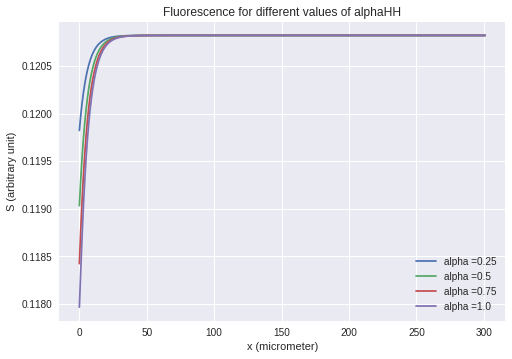

In [0]:
for i in x2:
  P[0][i]=P0
  R[0][i]=(ar/gr)*((P0**Np)/(Kp**Np+P0**Np))

for a in [0.25*ah,0.5*ah,0.75*ah,ah]:
  
  for i in t:
    #implémentation de H selon l'équation de diffusion "complète"
    H[i][0]=H[i-1][0]+dt*((D/dx)*((H[i-1][1]-H[i-1][0])/dx+a/D)-gh*H[i-1][0]-konhp*H[i-1][0]*P[i-1][0]+koffc*C[i-1][0])
    for j in x:
      H[i][j]=H[i-1][j]+dt*((D/(dx**2))*(H[i-1][j-1]-2*H[i-1][j]+H[i-1][j+1])-gh*H[i-1][j]-konhp*H[i-1][j]*P[i-1][j]-koffc*C[i-1][j])
    for j in x2:
      P[i][j]=P[i-1][j]+dt*(ap-gp*P[i-1][j]-konhp*H[i-1][j]*P[i-1][j]+koffc*C[i-1][j])
      C[i][j]=C[i-1][j]+dt*(konhp*H[i-1][j]*P[i-1][j]-koffc*C[i-1][j]+gc*C[i-1][j])
      R[i][j]=R[i-1][j]+dt*(ar*(((P[i-1][j])**Np)/(Kp**Np+(P[i-1][j])**Np))-gr*R[i-1][j])
      S[i][j]=S[i-1][j]+dt*(ag0+ag*((Kr**nr)/(Kr**nr+(R[i-1][j])**nr)))
    
  plt.plot(x2,S[nt],label="alpha ="+str(a/ah))

plt.xlabel('x (micrometer)')
plt.ylabel('S (arbitrary unit)')
plt.title('Fluorescence for different values of alphaHH')
plt.legend() 
plt.show()

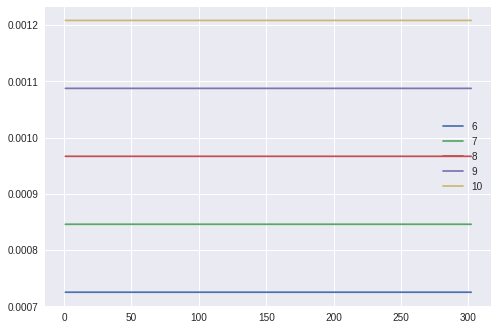

In [0]:
x=np.linspace(1,nx+2,nx+2)
plt.plot(x,S[600],label="6")
plt.plot(x,S[700],label="7")
plt.plot(x,S[800],label="8")
plt.plot(x,S[900],label="9")
plt.plot(x,S[1000],label="10")
plt.legend()

In [0]:
po=ap/gp
print po
ro=ar*(po**Np)/(gr*(Kp**Np+po**Np))
print ro
print (ag/ag0-1)**(1/nr)*Kr

4.0
166.71496515
110.770157651


In [0]:
#ici 
import numpy as np
import matplotlib.pyplot as plt


#paramètres
ap=0.024 #alpha ptc free PTCH production rate
gp=0.006 #gamma p free PTCH degradation rate
gc=0.1539 #gamma c HH-PTCH degratdation rate constant 
koffc=0.3018 #HH-PTCH complex dissociation rate constant
Np=0.9 #Hill coefficient for PTCH control of GLIR production
ar=0.3908 #alpha R GLIR production rate constant
gr=0.002 #gamma R GLIR degradation rate constant
Kr=8.5184 #Hill constant for GLIR control of signal production
nr=1.5735 #Hill coefficient for GLIR control of signal production
ag=0.0056881 #GLIR-dependent signal production rate constant
ag0=0.000098715 #Basal signal production rate constant
D=58.3931 #Free HH diffusion constant
gh=0.00081346 #Free HH degradation rate constant
konhp=0.3018 #HH-PTCH complex association rate constant
Kp=0.5660 #Hill constant for PTCH control of GLIR production

H0=1
dt=1
dx=1
nx=1000
nt=1000
x=np.linspace(1,nx,nx,dtype=int)
t=np.linspace(1,nt,nt,dtype=int)
  
H=np.zeros((nt+1,nx+2))
P=np.zeros((nt+1, nx+2))
C=np.zeros((nt+1, nx+2))
S=np.zeros((nt+1, nx+2))
R=np.zeros((nt+1, nx+2))

H[0][0]=H0


  
for i in t:
  H[i][0]=H0
  for j in x:
    H[i][j]=H[i-1][j]+dt*((D/dx)*(H[i-1][j-1]-2*H[i-1][j]+H[i-1][j+1])-gh*H[i-1][j]-konhp*H[i-1][j]*P[i-1][j]+koffc*C[i-1][j])
    P[i][j]=P[i-1][j]+dt*(ap-gp*P[i-1][j]-konhp*H[i-1][j]*P[i-1][j]+koffc*C[i-1][j])
    C[i][j]=C[i-1][j]+dt*(konhp*H[i-1][j]*P[i-1][j]-koffc*C[i-1][j]-gc*C[i-1][j])
    R[i][j]=R[i-1][j]+dt*(ar*(((P[i-1][j])**Np)/(Kp**Np+(P[i-1][j])**Np))-gr*R[i-1][j])
    S[i][j]=S[i-1][j]+dt*(ag0+ag*((Kr**nr)/(Kr**nr+(R[i-1][j])**nr)))
    
  
  
x=np.linspace(1,nx+2,nx+2)

#plt.plot(x,S[1])
#plt.plot(x,S[100])
plt.plot(x,H[50])

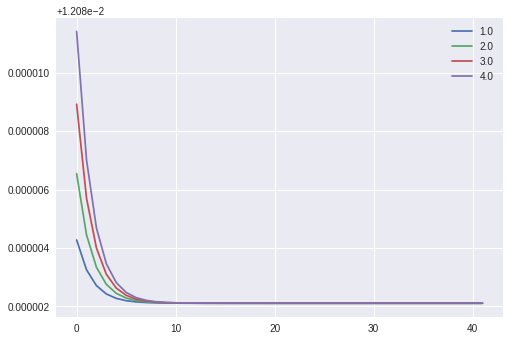

In [0]:
for i in x2:
  P[0][i]=P0
  R[0][i]=(ar/gr)*((P0**Np)/(Kp**Np+P0**Np))

for a in [0.25*ah,0.5*ah,0.75*ah,ah]:
  
  for i in t:
    H[i][0]=H[i-1][0]+dt*((D/dx)*((H[i-1][1]-H[i-1][0])/dx+a/D)-gh*H[i-1][0]-konhp*H[i-1][0]*P[i-1][0]+koffc*C[i-1][0])
    for j in x:
      H[i][j]=H[i-1][j]+dt*((D/(dx**2))*(H[i-1][j-1]-2*H[i-1][j]+H[i-1][j+1])-gh*H[i-1][j]-konhp*H[i-1][j]*P[i-1][j]+koffc*C[i-1][j])
    for j in x2:
      P[i][j]=P[i-1][j]+dt*(ap-gp*P[i-1][j]-konhp*H[i-1][j]*P[i-1][j]+koffc*C[i-1][j])
      C[i][j]=C[i-1][j]+dt*(konhp*H[i-1][j]*P[i-1][j]-koffc*C[i-1][j]-gc*C[i-1][j])
      R[i][j]=R[i-1][j]+dt*(ar*(((P[i-1][j])**Np)/(Kp**Np+(P[i-1][j])**Np))-gr*R[i-1][j])
      S[i][j]=S[i-1][j]+dt*(ag0+ag*((Kr**nr)/(Kr**nr+(R[i-1][j])**nr)))
    
  plt.plot(x2,S[nt],label=str(4*a/ah))

plt.legend()
plt.show()

  

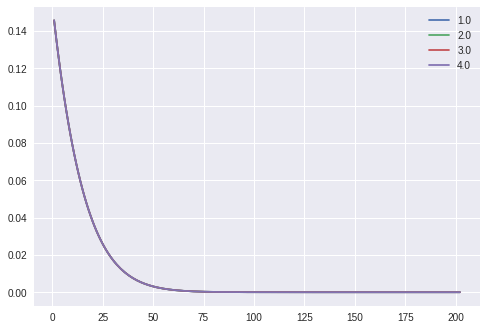

In [0]:
##equation de diffusion

import numpy as np
import matplotlib.pyplot as plt


#paramètres
ap=0.024 #alpha ptc free PTCH production rate
gp=0.006 #gamma p free PTCH degradation rate
gc=0.1539 #gamma c HH-PTCH degratdation rate constant 
koffc=0.3018 #HH-PTCH complex dissociation rate constant
Np=0.9 #Hill coefficient for PTCH control of GLIR production
ar=0.3908 #alpha R GLIR production rate constant
gr=0.002 #gamma R GLIR degradation rate constant
Kr=8.5184 #Hill constant for GLIR control of signal production
nr=1.5735 #Hill coefficient for GLIR control of signal production
ag=0.0056881 #GLIR-dependent signal production rate constant
ag0=0.000098715 #Basal signal production rate constant
D=58.3931 #Free HH diffusion constant
gh=0.00081346 #Free HH degradation rate constant
Kp=0.5660 #Hill constant for PTCH control of GLIR production
ah=0.5431 #HH flux into receiver field at 100% sender strength
Kh=2.2771 #HH-PTCH complex dissociation constant

konhp=koffc/Kh #HH-PTCH complex association rate constant
P0=ap/gp

dt=0.001
dx=1
nx=200
nt=10000
x=np.linspace(1,nx,nx,dtype=int)
t=np.linspace(1,nt,nt,dtype=int)
x2=np.linspace(1,nx+2,nx+2)
  
H=np.zeros((nt+1,nx+2))
P=np.zeros((nt+1, nx+2))
C=np.zeros((nt+1, nx+2))
S=np.zeros((nt+1, nx+2))
R=np.zeros((nt+1, nx+2))

for i in np.linspace(1,nx+2,nx+2,dtype=int):
  P[0][i-1]=P0
  R[0][i-1]=(ar/gr)*((P0**Np)/(Kp**Np+P0**Np))

for a in [0.25*ah,0.5*ah,0.75*ah,ah]:
  
  for i in t:
    H[i][0]=H[i-1][0]+dt*((D/dx)*((H[i-1][1]-H[i-1][0])/dx+ah/D)-gh*H[i-1][0]-konhp*H[i-1][0]*P[i-1][0]+koffc*C[i-1][0])

    for j in x:
      H[i][j]=H[i-1][j]+dt*((D/dx**2)*(H[i-1][j-1]-2*H[i-1][j]+H[i-1][j+1])-gh*H[i-1][j]-konhp*H[i-1][j]*P[i-1][j]+koffc*C[i-1][j])
      P[i][j]=P[i-1][j]+dt*(ap-gp*P[i-1][j]-konhp*H[i-1][j]*P[i-1][j]+koffc*C[i-1][j])
      C[i][j]=C[i-1][j]+dt*(konhp*H[i-1][j]*P[i-1][j]-koffc*C[i-1][j]-gc*C[i-1][j])
      R[i][j]=R[i-1][j]+dt*(ar*(((P[i-1][j])**Np)/(Kp**Np+(P[i-1][j])**Np))-gr*R[i-1][j])
      S[i][j]=S[i-1][j]+dt*(ag0+ag*((Kr**nr)/(Kr**nr+(R[i-1][j])**nr)))
    
  plt.plot(x2,H[nt],label=str(4*a/ah))

plt.legend()
plt.show()

P derivative

In [0]:
##equation de diffusion

import numpy as np
import matplotlib.pyplot as plt


#paramètres
ap=0.024 #alpha ptc free PTCH production rate
gp=0.006 #gamma p free PTCH degradation rate
gc=0.1539 #gamma c HH-PTCH degratdation rate constant 
Kh=2.2771 #HH-PTCH complex dissociation constant
koffc=0.3018 #HH-PTCH complex dissociation rate constant
Np=0.9 #Hill coefficient for PTCH control of GLIR production
ar=0.3908 #alpha R GLIR production rate constant
gr=0.002 #gamma R GLIR degradation rate constant
Kr=8.5184 #Hill constant for GLIR control of signal production
nr=1.5735 #Hill coefficient for GLIR control of signal production
ag=0.0056881 #GLIR-dependent signal production rate constant
ag0=0.000098715 #Basal signal production rate constant
D=58.3931 #Free HH diffusion constant
gh=0.00081346 #Free HH degradation rate constant
Kp=0.5660 #Hill constant for PTCH control of GLIR production
ah=0.5431 #HH flux into receiver field at 100% sender strength


konhp=koffc/Kh #HH-PTCH complex association rate constant
P0=ap/gp

dt=0.1
dx=10
nx=30
nt=10000
x=np.linspace(1,nx,nx,dtype=int)
t=np.linspace(1,nt,nt,dtype=int)
x2=np.linspace(0,nx+1,nx+2,dtype=int)
lscale=[]
amp=[]
  
H=np.zeros((nt+1,nx+2))
P=np.zeros((nt+1, nx+2))
C=np.zeros((nt+1, nx+2))
S=np.zeros((nt+1, nx+2))
R=np.zeros((nt+1, nx+2))

for i in x2:
  P[0][i]=P0
  R[0][i]=(ar/gr)*((P0**Np)/(Kp**Np+P0**Np))

for app in [0.25*ap,0.5*ap,0.75*ap,ap]:
  for ahh in [0.25*ah,0.5*ah,0.75*ah,ah]:

    for i in t:
              H[i][0]=H[i-1][0]+dt*((D/dx)*((H[i-1][1]-H[i-1][0])/dx+ahh/D)-gh*H[i-1][0]-konhp*H[i-1][0]*P[i-1][0]+koffc*C[i-1][0])
              for j in x:
                H[i][j]=H[i-1][j]+dt*((D/(dx**2))*(H[i-1][j-1]-2*H[i-1][j]+H[i-1][j+1])-gh*H[i-1][j]-konhp*H[i-1][j]*P[i-1][j]+koffc*C[i-1][j])
              for j in x2:
                P[i][j]=P[i-1][j]+dt*(ap-gp*P[i-1][j]-konhp*H[i-1][j]*P[i-1][j]+koffc*C[i-1][j])
                C[i][j]=C[i-1][j]+dt*(konhp*H[i-1][j]*P[i-1][j]-koffc*C[i-1][j]-gc*C[i-1][j])
                R[i][j]=R[i-1][j]+dt*(ar*(((P[i-1][j])**Np)/(Kp**Np+(P[i-1][j])**Np))-gr*R[i-1][j])
                S[i][j]=S[i-1][j]+dt*(ag0+ag*((Kr**nr)/(Kr**nr+(R[i-1][j])**nr)))
            lscale.append(np.argmin((S[nt]-np.linspace(S[nt][nx],S[nt][nx],nx+2)-(S[nt][0]-S[nt][nx])/np.exp(1))**2.))
            amp.append(S[nt][0]-S[nt][nx])
            plt.plot(x2,S[nt],label="alpha ="+str(ahh/ah))          


plt.xlabel('x (10*micrometer)')
plt.ylabel('H (nM)')
plt.title('Concentration of HH at different times')
plt.legend() 
plt.show()

print lscale
print amp


IndentationError: ignored